# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from functools import reduce

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
number = 1
lat = []
temp = []
name = []
lng = []
humidity = []
cloudy = []
wind = []
country = []
date = []
town = []
#cities = ['London']

In [4]:
# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        #response.append(city_data)
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        name.append(response['name'])
        temp.append(response['main']['temp_max'])
        cloudy.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        town.append(city)
    
        print(f"Processing Record {number} of Set {len(cities)} complete | Added{city}")
        number +=1
    except:
        print(f'Missing data in city number {number} of {len(cities)}. | Skipping {city}')
        number += 1
    print("------------------------------\nData Retrieval Complete\n------------------------------")
    #print(results)

#print(json.dumps(response, indent=4, sort_keys=True))

Processing Record 1 of Set 615 complete | Addedbutajira
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 2 of Set 615 complete | Addedhilo
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 3 of Set 615 complete | Addedbarrow
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 4 of Set 615 complete | Addednikolskoye
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 5 of Set 615 complete | Addedrio verde de mato grosso
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 6 of Set 615 complete | Addedkodiak
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 7 of Set 615 complete | Addedcoquimbo
------------------------------
Data Retrieval Complete
---------------------------

Processing Record 58 of Set 615 complete | Addednago
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 59 of Set 615 complete | Addedavarua
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 60 of Set 615 complete | Addedtura
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 61 of Set 615 complete | Addedkapaa
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 62 of Set 615 complete | Addedginda
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 63 of Set 615 complete | Addednishihara
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 64 of Set 615 complete | Addedtuktoyaktuk
------------------------------
Data Retrieval Complete
------------------------------
Processing 

Processing Record 115 of Set 615 complete | Addedtasiilaq
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 116 of Set 615 complete | Addedport elizabeth
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 117 of Set 615 complete | Addedbengkulu
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 118 of Set 615 complete | Addedmayumba
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 119 of Set 615 complete | Addedcidreira
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 120 of Set 615 complete | Addedtupelo
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 121 of Set 615 complete | Addedcarnarvon
------------------------------
Data Retrieval Complete
-------------------

Processing Record 173 of Set 615 complete | Addednieuw nickerie
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 174 of Set 615 complete | Addedipora
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 175 of Set 615 complete | Addedteshie
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 176 of Set 615 complete | Addedpraia da vitoria
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 177 of Set 615 complete | Addedahipara
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 178 of Set 615 complete | Addedgat
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 179 of Set 615 complete | Addedpasni
------------------------------
Data Retrieval Complete
-----------------------

Processing Record 231 of Set 615 complete | Addedharper
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 232 of Set 615 complete | Addedrorvik
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 233 of Set 615 complete | Addedlompoc
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 234 of Set 615 complete | Addedbelaya gora
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 235 of Set 615 complete | Addedwalvis bay
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 236 of Set 615 complete | Addedthompson
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 237 of Set 615 complete | Addedust-maya
------------------------------
Data Retrieval Complete
------------------------

Missing data in city number 289 of 615. | Skipping vaitupu
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 290 of Set 615 complete | Addedjacmel
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 291 of Set 615 complete | Addedpodgornoye
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 292 of Set 615 complete | Addedhoward springs
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 293 of Set 615 complete | Addednajran
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 294 of Set 615 complete | Addedmyitkyina
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 295 of Set 615 complete | Addedolafsvik
------------------------------
Data Retrieval Complete
-----------------

Processing Record 346 of Set 615 complete | Addedsitka
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 347 of Set 615 complete | Addedtorbay
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 348 of Set 615 complete | Addedauki
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 349 of Set 615 complete | Addedbrigantine
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 350 of Set 615 complete | Addedtalas
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 351 of Set 615 complete | Addedtougan
------------------------------
Data Retrieval Complete
------------------------------
Missing data in city number 352 of 615. | Skipping haibowan
------------------------------
Data Retrieval Complete
------------------------------
Pr

Processing Record 404 of Set 615 complete | Addedaswan
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 405 of Set 615 complete | Addedtongchuan
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 406 of Set 615 complete | Addedchuchkovo
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 407 of Set 615 complete | Addedarkansas city
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 408 of Set 615 complete | Addedsaskylakh
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 409 of Set 615 complete | Addedroma
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 410 of Set 615 complete | Addeddiego de almagro
------------------------------
Data Retrieval Complete
--------------

Processing Record 461 of Set 615 complete | Addedchuy
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 462 of Set 615 complete | Addedsantos reyes nopala
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 463 of Set 615 complete | Addedchamperico
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 464 of Set 615 complete | Addedpisco
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 465 of Set 615 complete | Addedmoron
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 466 of Set 615 complete | Addedcoahuayana
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 467 of Set 615 complete | Addedde aar
------------------------------
Data Retrieval Complete
--------------------

Processing Record 519 of Set 615 complete | Addedrio tercero
------------------------------
Data Retrieval Complete
------------------------------
Missing data in city number 520 of 615. | Skipping bolungarvik
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 521 of Set 615 complete | Addedcap malheureux
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 522 of Set 615 complete | Addedvao
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 523 of Set 615 complete | Addedviransehir
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 524 of Set 615 complete | Addedegvekinot
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 525 of Set 615 complete | Addedaitape
------------------------------
Data Retrieval Complete
-------------

Processing Record 577 of Set 615 complete | Addedpolson
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 578 of Set 615 complete | Addedbatamshinskiy
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 579 of Set 615 complete | Addedzolotkovo
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 580 of Set 615 complete | Addedmackay
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 581 of Set 615 complete | Addedtual
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 582 of Set 615 complete | Addedbasoko
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 583 of Set 615 complete | Addedozernovskiy
------------------------------
Data Retrieval Complete
------------------------

In [5]:
try:
    weather_dict = {
        "City": town,
        "Lat": lat,
        'Lng': lng, 
        'Max Temp': temp, "Humidity": humidity,
       'Cloudiness': cloudy, 'Wind Speed': wind, 'Country': country, 'Date': date    
    }

    
except (KeyError, IndexError, ValueError): 
    print('Not enough information for a reasonable conclusion.')
    
    weather_dict


weather_data_df = pd.DataFrame(weather_dict)
    
#weather_data_df.head()
#weather_data_df["Lat"] = ""
#weather_data_df["Lng"] = ""
#weather_data_df['Max Temp'] = ""
#weather_data_df['Humidity'] = ""
#weather_data_df['Cloudiness'] = ""
# weather_data_df['Wind Speed'] = ""
# #weather_data_df['Country'] = ""
# weather_data_df['Date'] = ""
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butajira,8.12,38.37,14.89,76,46,1.41,ET,1592607160
1,hilo,19.73,-155.09,27.00,61,90,2.10,US,1592607160
2,barrow,71.29,-156.79,2.00,85,90,2.60,US,1592607161
3,nikolskoye,59.70,30.79,19.00,72,24,5.00,RU,1592607161
4,rio verde de mato grosso,-18.92,-54.84,23.17,62,6,2.19,BR,1592607123


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butajira,8.12,38.37,14.89,76,46,1.41,ET,1592607160
1,hilo,19.73,-155.09,27.00,61,90,2.10,US,1592607160
2,barrow,71.29,-156.79,2.00,85,90,2.60,US,1592607161
3,nikolskoye,59.70,30.79,19.00,72,24,5.00,RU,1592607161
4,rio verde de mato grosso,-18.92,-54.84,23.17,62,6,2.19,BR,1592607123


In [7]:
weather_data_df.to_csv('Weather_Data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
weather_over_df = weather_data_df.loc[weather_data_df['Humidity'] > 100]
weather_over_df.head()

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

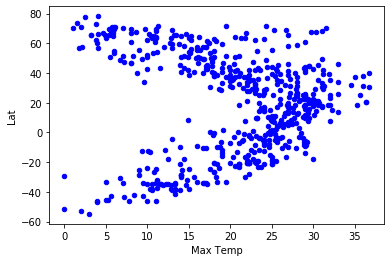

In [17]:

weather_data_df.plot(kind='scatter',x='Max Temp',y='Lat',color='blue')
plt.show()            
            
#plt.xlabel('Latitude')
#plt.ylabel('Temperature')
#fig.save

## Latitude vs. Humidity Plot

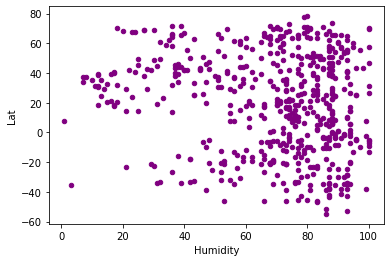

In [18]:
weather_data_df.plot(kind='scatter',x='Humidity',y='Lat',color='purple')
plt.show() 

## Latitude vs. Cloudiness Plot

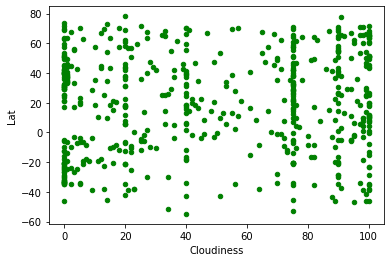

In [19]:
weather_data_df.plot(kind='scatter',x='Cloudiness',y='Lat',color='green')
plt.show() 

## Latitude vs. Wind Speed Plot

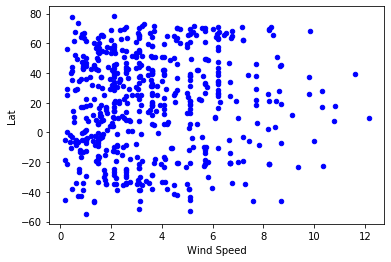

In [20]:
weather_data_df.plot(kind='scatter',x='Wind Speed',y='Lat',color='blue')
plt.show() 

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [24]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data_df.loc[weather_data_df['Lat'] > 0]
southern_df = weather_data_df.loc[weather_data_df['Lat'] < 0]
northern_df.head()
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,rio verde de mato grosso,-18.92,-54.84,23.17,62,6,2.19,BR,1592607123
6,coquimbo,-29.95,-71.34,14.00,87,27,2.60,CL,1592607092
9,hobart,-42.88,147.33,5.56,93,40,0.71,AU,1592606924
11,huarmey,-10.07,-78.15,18.33,80,16,5.22,PE,1592607162
12,saint-philippe,-21.36,55.77,21.00,73,20,8.20,RE,1592607162


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

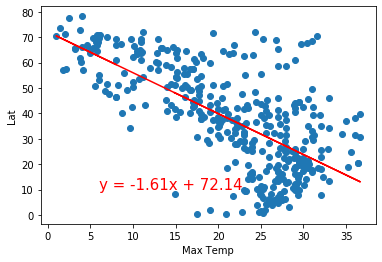

In [28]:
x_values = northern_df['Max Temp']
y_values = northern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Lat')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression